# Seyed Mohammad Amin Atyabi - 830402014

# Finding Decision Boundary

**1**

<img src="res/FDB_1.jpg" width="1280">

**2**

<div style="display:block" direction=rtl align=right>
در بعضی از موارد، حل کردن دوگان مسأله ساده‌تر از حل کردن خود مسأله است
در تئوری بهینه‌سازی ریاضی، دوگان به این معنی است که به مسأله‌های بهینه‌سازی می توان از دو زاویه نگاه کرد، خود مسأله یا دوگان مسأله (اصل دوگان).
اگر یک مسأله کمینه‌سازی داشته باشیم، می‌توانیم همچنین آن را به صورت یک مسأله بیشینه‌سازی در نظر بگیریم و زمانی که ماکزیمم این مسأله را پیدا کنیم می‌تواند حد پایین در حل مسأله کمینه‌سازی باشد و همیشه کمتر  یا مساوی مینیمم مسأله کمینه‌سازی است.
</div>

# Soft Margin Classifier

**1**

<div style="display:block" direction=rtl align=right>
 ضریب C تعیین کننده میزان خطای قابل پذیرش و پهنای حاشیه جداساز است . اگر ضریب کوچک باشد باعث میشود که خطا (ورود دیتا پوینت ها به حاشیه) کوچک شمرده شود در نتیجه عرض حاشیه جداساز زیاد خواهد شد . اگر ضریب بزرگ باشد تاثیر خطا زیاد خواهد شد فلذا سعی در جداسازی صحیحتر خواهیم داشت که منجر به حاشه کمتر میشود .
 کران بالای خطای طبقه بندی برابر با مجموع خطای هر نقطه خواهد بود در صورتی که تمام نقاط وارد حاشیه شده باشند .
</div>

**2**

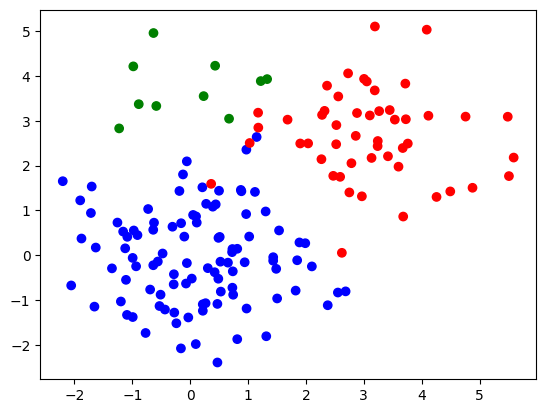

In [2]:
import pandas
from matplotlib import pyplot as plt

data_points = pandas.read_csv('data/data.csv')

plt.scatter(data_points['X'], data_points['Y'], color=data_points['Label'].replace(1, 'b').replace(2, 'r').replace(3, 'g'))
plt.show()

همانطور که مشخص است ، با زیاد شدن ضریب خطا ، خطوط جدا ساز به نحوی عمل میکنند که کمترین میزان نقاط از مرض عبور کنند

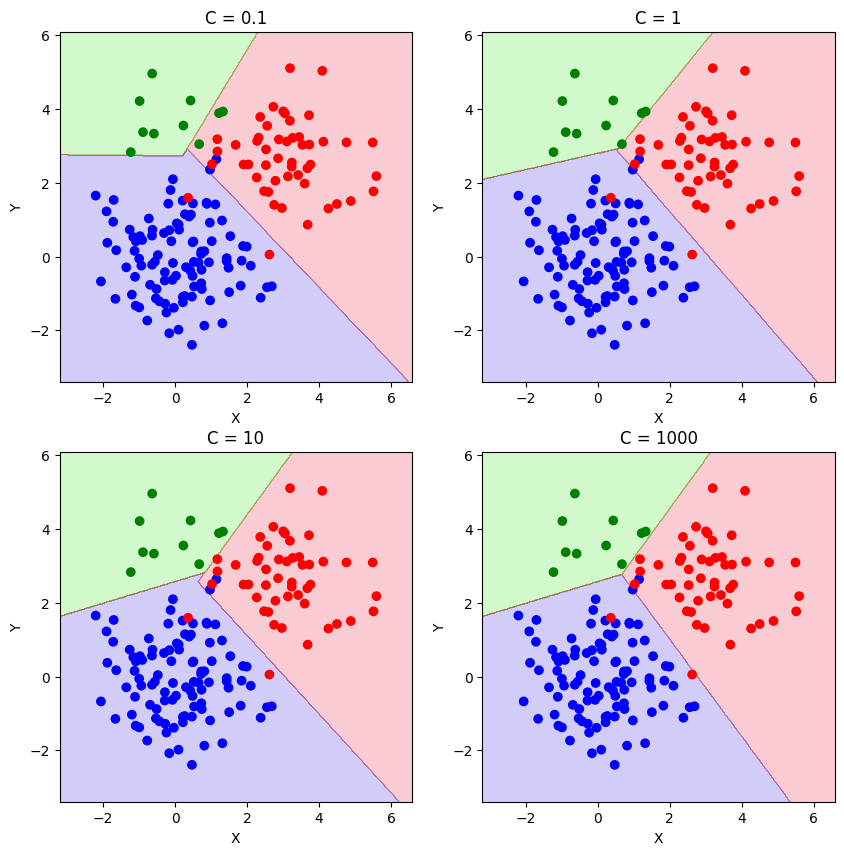

In [3]:
import numpy
import warnings
from sklearn import svm

warnings.filterwarnings('ignore')

plot = 1
plt.figure(figsize=(10, 10))

for c in [0.1, 1, 10, 1000]:
    model = svm.SVC(kernel='linear', C=c).fit(data_points.drop(data_points.columns[[0, 3]], axis=1),
                                              data_points['Label'])

    x_min, x_max = data_points['X'].min() - 1, data_points['X'].max() + 1
    y_min, y_max = data_points['Y'].min() - 1, data_points['Y'].max() + 1
    h = abs((x_max / x_min) / 100)
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))

    Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, plot)
    plot += 1

    plt.contourf(xx, yy, Z, cmap='brg', alpha=0.2)

    plt.scatter(data_points['X'], data_points['Y'],
                c=data_points['Label'].replace(1, 'b').replace(2, 'r').replace(3, 'g'), cmap='brg')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx.min(), xx.max())
    plt.title(f'C = {c}')

plt.show()

# Kernel Trick

**1**

<div style="display:block" direction=rtl align=right>
تابع تبدیل زیر سبب میشود داده هایی که به صورت خطی قابل جداسازی نیستند به صورتی خطی قابل جداسازی باشند . این تابع نقاط را از فضای یک بعدی به فضای دو بعدی میبرد.
</div>

$$ \phi(x) = (x, x^2) $$

**2**

<div style="display:block" direction=rtl align=right>
به طور عام برای این کرنل شرط مرسر بر قرار نیست . در حالت کلی این تابع میتواند شرط مثبت بودن را نقض کند ، اما با اعمال برخی شرایط میتوان از این حالت دوری کرد.
به ازای مقادیر بزرگ آلفا احتمال مثبت نشدن کرنل کم میشود اما همچنان این امکان وجود دارد.
</div>

**3**

<img src="res/KT_1.jpg" width="1280">

**4**

<div style="display:block" direction=rtl align=right>

در حالت کلی، کرنل

 RBF 
 
انتخاب بهتری برای مجموعه داده هایی است که دارای روابط غیرخطی پیچیده هستند. کرنل

 Polynomial 
 
برای مجموعه داده هایی مناسب است که دارای روابط غیرخطی ساده هستند و نیاز به تفسیرپذیری دارند.
</div>

**5**

در این قسمت از روش TF-IDF برای استخراج ویژگی ها استفاده میکنیم

این روش بر خلاف روش CountVectorizer که تنهای متن را تبدیل به عدد میکند ، بررسی میکند که یک کلمه چقدر با متن مرتبط تر است فلذا از روش مطرح شده در صورت سوال استفاده نکردم

برای بسیار زیاد نشدن تعداد ویژگی ها ، تنها 100 ویژگی استخراج میکنیم

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


stock_data = pandas.read_csv('data/stock_data.csv')

feature_list = []

def find_feature(name, count):
    corpus = stock_data[name].tolist()
    vectorizer = TfidfVectorizer()
    vectorized = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    values = numpy.asarray(vectorized.sum(axis=0))[0]
    result = dict(zip(feature_names, values))
    result = dict(sorted(result.items(), key=lambda item: item[1]))
    i = 0
    while i < count:
        f = next(reversed(result.keys()))
        result.pop(f)
        if f not in feature_list:
            feature_list.append(f)
            stock_data[f'Feature {f}'] = 0
        else:
            count += 1
        i += 1

find_feature('Text', 100)

for index, row in stock_data.iterrows():
    for f in feature_list:
        text = stock_data['Text'][index].split().count(f)
        stock_data[f'Feature {f}'][index] = text

print(feature_list)
stock_data

['the', 'to', 'on', 'aap', 'in', 'for', 'of', 'is', 'and', 'user', 'it', 'short', 'at', 'co', 'https', 'this', 'up', 'here', 'over', 'today', 'will', 'volume', 'out', 'from', 'long', 'with', 'day', 'like', 'be', 'that', 'bac', '50', 'as', 'good', 'nice', 'watch', 'are', 'some', 'goog', 'but', 'now', 'if', 'above', 'new', 'stop', 'more', 'down', 'my', 'you', 'triangle', 'still', 'off', 'not', 'back', 'stock', 'move', 'has', 'higher', 'next', 'weekly', 'we', 'buy', 'ong', 'after', 'breakout', '10', 'time', 'no', 'have', 'looking', 'market', 'see', 'by', 'all', 'an', 'just', 'break', 'coronavirus', 'green', 'close', 'trade', 'week', 'so', 'sensex', '20', '11', 'one', 'go', 'nfx', 'again', 'support', 'going', 'bullish', 'highs', 'nifty', 'or', 'looks', 'big', 'amzn', '30']


,Text,Sentiment,Feature the,Feature to,Feature on,Feature aap,Feature in,Feature for,Feature of,Feature is,...,Feature support,Feature going,Feature bullish,Feature highs,Feature nifty,Feature or,Feature looks,Feature big,Feature amzn,Feature 30
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,2,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,user I'd be afraid to short AMZN - they are lo...,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MNTA Over 12.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,OI Over 21.37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,2,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'kernel': ('poly', 'rbf'),
              'coef0': [0.1, 0.5, 0.9]}
base_estimator = SVC()
search = HalvingGridSearchCV(base_estimator, param_grid)
result = search.fit(stock_data.drop(columns=['Sentiment', 'Text']), stock_data['Sentiment'])

print(f'Score : {search.best_score_}')
print(f'Best Parameter : {search.best_params_}')

predicted = search.predict(stock_data.drop(columns=['Sentiment', 'Text']))

confusion_matrix(stock_data['Sentiment'], predicted)

Ridge R2 Score : 0.671620667469768
Ridge Best Parameter : {'coef0': 0.5, 'kernel': 'rbf'}


array([[ 718, 1388],
       [  58, 3627]], dtype=int64)

In [14]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(stock_data.drop(columns=['Sentiment', 'Text']), stock_data['Sentiment'])

nb_predicted = naive_bayes.predict(stock_data.drop(columns=['Sentiment', 'Text']))

confusion_matrix(stock_data['Sentiment'], nb_predicted)

array([[1747,  359],
       [2023, 1662]], dtype=int64)